In [1]:
import sys
#sys.path.insert(0, '../third/xgboost/python-package/build/lib/')

In [2]:
%pylab inline
import pandas as pd
import lightgbm as lgb

Populating the interactive namespace from numpy and matplotlib


In [3]:
lgb.__version__

'2.0.1'

In [4]:
df=pd.read_csv('../input/newtrain.csv',index_col=0)

In [5]:
df=df.loc[np.random.permutation(df.index)]

In [6]:
trainx=df.drop(['target'],axis=1)
trainy=df['target']

In [7]:
trainx.shape

(595212, 62)

In [8]:
trainx.shape

(595212, 62)

In [9]:
595212*0.8

476169.60000000003

In [10]:
split = 470000
x_train, y_train, x_valid, y_valid = trainx[:split], trainy[:split], trainx[split:], trainy[split:]

print('Building DMatrix...')

d_train = lgb.Dataset(x_train, label=y_train)
d_valid = lgb.Dataset(x_valid, label=y_valid)




Building DMatrix...


In [11]:
print('Training ...')

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 10,
}

gbm = lgb.train(params,
                d_train,
                num_boost_round=500,
                valid_sets=d_valid,
                early_stopping_rounds=50)


Training ...
[1]	valid_0's auc: 0.606271
Train until valid scores didn't improve in 50 rounds.
[2]	valid_0's auc: 0.611535
[3]	valid_0's auc: 0.618212
[4]	valid_0's auc: 0.618789
[5]	valid_0's auc: 0.618464
[6]	valid_0's auc: 0.618889
[7]	valid_0's auc: 0.618689
[8]	valid_0's auc: 0.619142
[9]	valid_0's auc: 0.619109
[10]	valid_0's auc: 0.61908
[11]	valid_0's auc: 0.620041
[12]	valid_0's auc: 0.620517
[13]	valid_0's auc: 0.622122
[14]	valid_0's auc: 0.622546
[15]	valid_0's auc: 0.622751
[16]	valid_0's auc: 0.622386
[17]	valid_0's auc: 0.622171
[18]	valid_0's auc: 0.621863
[19]	valid_0's auc: 0.622767
[20]	valid_0's auc: 0.622581
[21]	valid_0's auc: 0.623082
[22]	valid_0's auc: 0.623282
[23]	valid_0's auc: 0.623777
[24]	valid_0's auc: 0.624074
[25]	valid_0's auc: 0.624912
[26]	valid_0's auc: 0.625324
[27]	valid_0's auc: 0.62559
[28]	valid_0's auc: 0.625679
[29]	valid_0's auc: 0.625966
[30]	valid_0's auc: 0.625967
[31]	valid_0's auc: 0.626717
[32]	valid_0's auc: 0.626809
[33]	valid_0's a

In [12]:
gbm.best_iteration

139

In [13]:
a= gbm.dump_model()[u'tree_info']

In [14]:
len(a)

139

In [15]:
 (a[3]["tree_structure"]) .keys()

[u'default_value',
 u'internal_count',
 u'right_child',
 u'split_feature',
 u'internal_value',
 u'threshold',
 u'split_gain',
 u'split_index',
 u'decision_type',
 u'left_child']

In [16]:
 (a[3]["tree_structure"])[u'split_feature']

35

In [17]:
 (a[3]["tree_structure"])[u'threshold']

0.94090909085

In [18]:
 (a[3]["tree_structure"])[u'split_index']

0

In [19]:
 (a[3]["tree_structure"])[u'split_gain']

86.63364874955732

In [20]:
 (a[3]["tree_structure"]) 

{u'decision_type': u'no_greater',
 u'default_value': 0,
 u'internal_count': 376000,
 u'internal_value': 0,
 u'left_child': {u'decision_type': u'no_greater',
  u'default_value': 0,
  u'internal_count': 297627,
  u'internal_value': -1.6335736795443565,
  u'left_child': {u'decision_type': u'no_greater',
   u'default_value': 0,
   u'internal_count': 264022,
   u'internal_value': -1.6412015738009245,
   u'left_child': {u'decision_type': u'no_greater',
    u'default_value': 1.7976931348623157e+308,
    u'internal_count': 184170,
    u'internal_value': -1.6527924335225073,
    u'left_child': {u'decision_type': u'no_greater',
     u'default_value': -9.999999682655225e-21,
     u'internal_count': 61884,
     u'internal_value': -1.629209167254015,
     u'left_child': {u'decision_type': u'no_greater',
      u'default_value': 1.7976931348623157e+308,
      u'internal_count': 59682,
      u'internal_value': -1.6339525755679176,
      u'left_child': {u'leaf_count': 57107,
       u'leaf_index': 0,
  

In [25]:
import json
dumpjson=gbm.dump_model()
features=dumpjson['feature_names']
trees=[u['tree_structure'] for u in dumpjson[u'tree_info'][:gbm.best_iteration]]
len(trees)

139

In [26]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [27]:
tree= (trees[7])

In [28]:
g=nx.DiGraph()

In [29]:
def addNode(node):
    #print node.keys()
    if 'split_feature' in node:
        g.add_node(node[ u'split_feature'])
    if  'right_child' in node:
        addNode(node['right_child'])
    if  u'left_child' in node:
        addNode(node['left_child'])
#addNode(tree)            

In [32]:
def addEdge(node):
    name1=None
    if 'split_feature' in node:
        name1=node['split_index']
    if  'right_child' in node:
        n2= node['right_child']
        if 'split_feature' in n2:
            name2=n2['split_index']
            assert name1 is not None
            g.add_edge(name1,name2)
            #print "r", name1,name2
            addEdge(n2)
            
    if  'left_child' in node:
        n2= node['left_child']
        if 'split_feature' in n2:
            name2=n2['split_index']
            assert name1 is not None            
            g.add_edge(name1,name2)
            #print "l", name1,name2            
            addEdge(n2)

addEdge(tree)            

In [34]:
tree_features=[]
def what_features(node):
    name1=None
    if 'split_feature' in node:
        name1=node['split_feature']
        tree_features.append(features[name1])
    if  'right_child' in node:
        n2= node['right_child']
        if 'split_feature' in n2:
            name2=n2['split_feature']
            tree_features.append(features[name2])
            what_features(n2)
            
    if  'left_child' in node:
        n2= node['left_child']
        if 'split_feature' in n2:
            name2=n2['split_feature']
            tree_features.append(features[name2])
            what_features(n2)

what_features(tree)        
print len(tree_features),len(set(tree_features))
pd.Series(tree_features).value_counts()

59 15


ps_ind_05_cat      14
ps_reg_02          10
ps_car_13_float     5
ps_ind_17_bin       4
ps_car_12_float     4
ps_car_07_cat       4
ps_ind_15           2
ps_car_03_cat       2
ps_ind_6789         2
ps_car_01_cat       2
ps_reg_01           2
ps_calc_04          2
ps_calc_12          2
ps_car_09_cat       2
ps_calc_02          2
dtype: int64

/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/spark/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/spark/anaconda2/lib/python2.7/

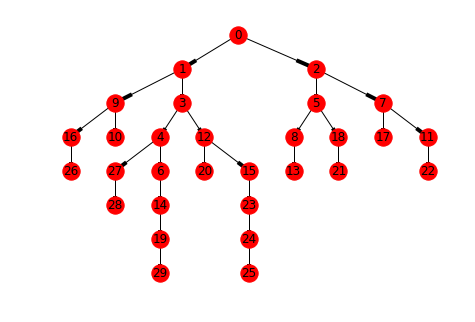

In [31]:
pos=graphviz_layout(g, prog='dot')
#pos = hierarchy_pos(g,root_node)    
nx.draw(g,pos,with_labels=True)

In [22]:
def parse_tree(node):
    if 'leaf' in node:
        return [[]]
    nodeid=node['nodeid']
    split=node['split']
    split_cond=node['split_condition']
    yes=node['yes']
    no=node['no']
    missing=node['missing']
    children1=parse_tree([u for u in node["children"] if u['nodeid']==yes][0])
    children2=parse_tree([u for u in node["children"] if u['nodeid']==no][0])
    cond1=[('yes',split,split_cond)]
    cond2=[('no',split,split_cond)]
    if missing==yes:
        cond1.append(('missing',split))
    elif missing==no:
        cond2.append(('missing',split))
    else:
        raise 2
    cond1=sorted(cond1)
    cond2=sorted(cond2)
    ret1=[ sorted([cond1]+u) for u in children1]
    ret2=[ sorted([cond2]+u) for u in children2]
    return ret1+ret2
    
    

In [23]:
def enumerate_all_conds(tree):
    ret=[]
    cond_list=(parse_tree(tree))
    for cond in cond_list:
        for i in range(len(cond)):
            ret.append(cond[:i+1])
    return ret

In [24]:
cond_list=(enumerate_all_conds(trees[8]))
len(cond_list)

1209

In [25]:
cond_list[12]

[[('missing', u'ps_calc_11'), ('yes', u'ps_calc_11', 6)],
 [('missing', u'ps_car_01_cat'), ('yes', u'ps_car_01_cat', 9)],
 [('missing', u'ps_car_07_cat'), ('yes', u'ps_car_07_cat', 1)],
 [('missing', u'ps_car_13_float'), ('yes', u'ps_car_13_float', 0.943562)],
 [('missing', u'ps_ind_04_cat'), ('yes', u'ps_ind_04_cat', 0)]]

In [26]:
all_conds=reduce(lambda u,v: u+v, [enumerate_all_conds(t) for t in trees])
len(all_conds)

786283

In [27]:
(cond_list[22])

[[('missing', u'ps_car_01_cat'), ('yes', u'ps_car_01_cat', 9)],
 [('missing', u'ps_car_07_cat'), ('yes', u'ps_car_07_cat', 1)],
 [('missing', u'ps_car_13_float'), ('yes', u'ps_car_13_float', 0.943562)],
 [('missing', u'ps_ind_04_cat'), ('yes', u'ps_ind_04_cat', 0)],
 [('missing', u'ps_ind_05_cat'), ('yes', u'ps_ind_05_cat', 2)],
 [('missing', u'ps_ind_17_bin'), ('yes', u'ps_ind_17_bin', 1)],
 [('no', u'ps_calc_11', 6)]]

In [28]:
unique_conds={}
for u in all_conds:
    s=str(u)
    if s not in unique_conds:
        unique_conds[s]=u
unique_conds = list(unique_conds.values())

In [29]:
len(unique_conds)

326603

In [30]:
df.shape[0]*len(unique_conds)*64.0/1024**3

11587.025215387344

In [31]:
df.shape[0]*len(unique_conds)*16.0/1024**3

2896.756303846836

In [32]:
df.shape[0]*100000.*64/1024**3

3547.7399826049805

In [33]:
import cPickle as pickle
pickle.dump(unique_conds,open("xgb_conds.pkl",'wb'))

In [34]:
def value_cond_tuple (df,cond):
    #print cond
    col=cond[1]
    if cond[0]=='missing':
        return np.isnan(df[col])
    else:
        split_val=cond[2]
        if cond[0]=='yes':
            return df[col]<split_val
        elif cond[0]=='no':
            return df[col]>=split_val
        else:
            raise "never be here"
def value_cond_single(df,conds):
    return reduce(lambda u,v: u | v, [value_cond_tuple(df,cond) for cond in conds])
def value_cond(df,conds):
    return reduce(lambda u,v: u & v, [value_cond_single(df,cond) for cond in conds])
def value_trees(df,trees):
    cond_lists=reduce(lambda u,v: u+v, [enumerate_all_conds(tree) for tree in trees])
    return cond_lists, pd.DataFrame([value_cond(df, conds) for conds in cond_lists]).T

In [35]:
value_cond(df,unique_conds[17]).mean()

0.00068883019831589417

In [36]:
for i in range(100):
    print i, np.round(df['target'][value_cond(df,unique_conds[i])].mean()-0.036447517859182946,3)

0 -0.003
1 -0.005
2 0.097
3 0.012
4 0.0
5 -0.036
6 -0.0
7 0.008
8 0.04
9 -0.002
10 0.042
11 0.006
12 0.008
13 -0.0
14 -0.007
15 -0.005
16 0.015
17 0.0
18 -0.001
19 0.027
20 -0.008
21 -0.011
22 0.004
23 0.038
24 -0.008
25 -0.007
26 0.09
27 0.007
28 0.032
29 -0.003
30 -0.003
31 0.021
32 0.186
33 -0.002
34 0.209
35 -0.02
36 -0.009
37 0.081
38 -0.001
39 0.008
40 0.045
41 -0.0
42 0.418
43 0.032
44 0.015
45 0.023
46 -0.007
47 0.03
48 0.007
49 0.03
50 0.002
51 -0.029
52 0.089
53 0.0
54 -0.006
55 0.008
56 0.138
57 0.018
58 -0.0
59 0.029
60 0.009
61 -0.005
62 -0.014
63 0.004
64 0.014
65 0.005
66 -0.002
67 -0.005
68 -0.01
69 -0.02
70 -0.003
71 0.012
72 -0.002
73 -0.036
74 0.036
75 0.005
76 -0.003
77 0.106
78 0.003
79 0.002
80 0.017
81 0.0
82 -0.003
83 0.014
84 0.013
85 -0.001
86 -0.0
87 0.009
88 -0.008
89 -0.015
90 -0.036
91 -0.005
92 0.012
93 0.012
94 0.006
95 0.005
96 -0.001
97 0.003
98 0.047
99 -0.008
